<a href="https://colab.research.google.com/github/Scotti001/Scotti001/blob/master/Regress%C3%A3o_M%C3%A1quina_de_Vetores_de_Suporte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Bibliotecas

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [2]:
from google.colab import files

# Abrir o explorador de arquivos para selecionar o arquivo
uploaded = files.upload()

# O dicionário `uploaded` conterá o nome do arquivo como chave e o conteúdo como valor
# Caso queira salvar o nome do arquivo em uma variável:
for file_name in uploaded.keys():
    print(f'Arquivo {file_name} foi carregado com sucesso.')


Saving forestfires.csv to forestfires.csv
Arquivo forestfires.csv foi carregado com sucesso.


In [9]:
# Importando o dataset

dataset = pd.read_csv('/content/forestfires.csv')

X = dataset[['temp']]
y = dataset[['area']]

In [10]:
# Pré-processamento

scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

scaler_X = StandardScaler()
X = scaler_X.fit_transform(X)

In [11]:
# Criando o regressor da SVM

regressor = SVR(kernel='rbf')

regressor.fit(X, y.ravel())

SVR()

In [12]:
# Prevendo um resultado

## Posição a ser prevista: 6.5 (entre 6 e 7)
pos = 3.5

## Para adequar os dados à característica, normalizamos o valor de entrada com o mesmo parâmetro do normalizador de X
scaled_pos = scaler_X.transform([[pos]])

## Realizando a previsão no dado normalizado
normalized_pred = regressor.predict(scaled_pos)

## O resultado retornado está normalizado, assim como o conjunto de dados
## Para encontrar o real resultado, revertemos a normalização
pred = scaler_y.inverse_transform([normalized_pred])

pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[6.77822113]])

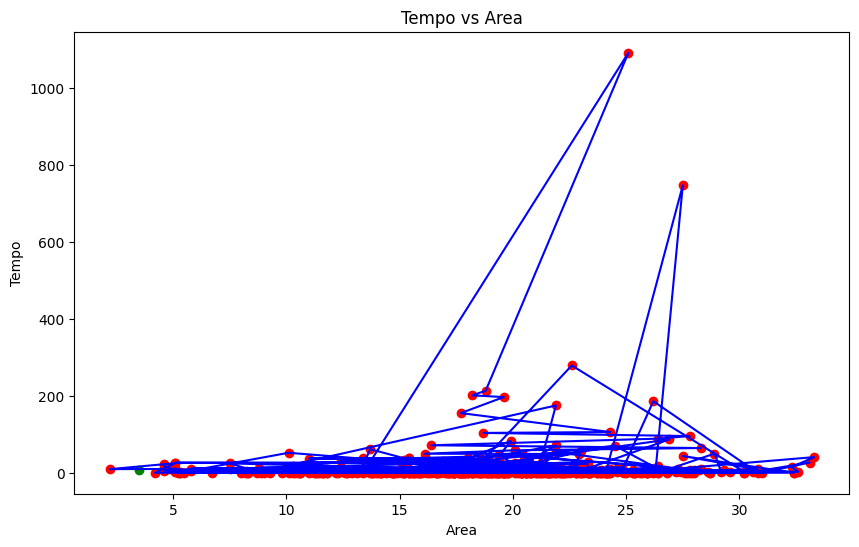

In [15]:
# Visualizando os resultados

fig, ax = plt.subplots(figsize=(10,6))

# Dados originais
ax.plot(dataset['temp'], dataset['area'], color='blue')
ax.scatter(x=dataset['temp'], y=dataset['area'], color='red')

# Dado previsto (em verde)
ax.scatter(x=pos, y=pred[0][0], color='green')

ax.set_title('Tempo vs Area')

ax.set_ylabel('Tempo')
ax.set_xlabel('Area')

plt.show()

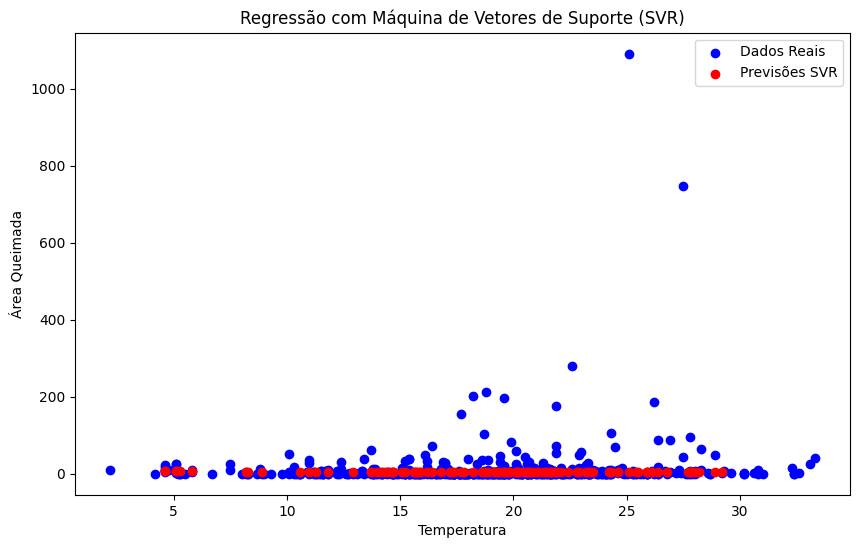

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import numpy as np
import matplotlib.pyplot as plt

# Carregar o arquivo CSV fornecido pelo usuário
file_path = '/content/forestfires.csv'
dataset = pd.read_csv(file_path)

# Selecionar as variáveis de entrada (temp) e saída (area)
X = dataset[['temp']].values
y = dataset[['area']].values

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalonar os dados
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

# Criar o regressor SVM para regressão (SVR)
regressor = SVR(kernel='rbf')
regressor.fit(X_train, y_train.ravel())

# Fazer previsões com o conjunto de teste
y_pred = regressor.predict(X_test)
y_pred_original_scale = scaler_y.inverse_transform(y_pred.reshape(-1, 1))

# Visualizar os resultados
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Dados Reais')
plt.scatter(scaler_X.inverse_transform(X_test), y_pred_original_scale, color='red', label='Previsões SVR')
plt.title('Regressão com Máquina de Vetores de Suporte (SVR)')
plt.xlabel('Temperatura')
plt.ylabel('Área Queimada')
plt.legend()
plt.show()
